In [1]:
# CNNで学習済みのモデルとmnistデータセットをロードする

import keras
from keras.datasets import mnist
from keras import backend as K
from keras.models import model_from_json

num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# モデルとウェイトをjsonとhdf5ファイルからロード
model = model_from_json(open('mnist_cnn_model.json').read())
model.load_weights('mnist_cnn_weights.hdf5')

print("モデルのグラフで構成される層を平坦化したリスト(model.layers)")
for nn in range(len(model.layers)):
    print("layer -",nn+1, model.layers[nn])
print("テンソル入力のリスト(model.inputs)")
print(model.inputs)
print("テンソル出力のリスト(model.outputs)")
print(model.outputs)

Using TensorFlow backend.


モデルのグラフで構成される層を平坦化したリスト(model.layers)
layer - 1 <keras.layers.convolutional.Conv2D object at 0x000001D1E801A240>
layer - 2 <keras.layers.convolutional.Conv2D object at 0x000001D1E801A6D8>
layer - 3 <keras.layers.pooling.MaxPooling2D object at 0x000001D1E801A4A8>
layer - 4 <keras.layers.core.Dropout object at 0x000001D1EA0B0BA8>
layer - 5 <keras.layers.core.Flatten object at 0x000001D1EA0B0240>
layer - 6 <keras.layers.core.Dense object at 0x000001D1EA0C5F60>
layer - 7 <keras.layers.core.Dropout object at 0x000001D1EA117780>
layer - 8 <keras.layers.core.Dense object at 0x000001D1EA117A58>
テンソル入力のリスト(model.inputs)
[<tf.Tensor 'conv2d_1_input:0' shape=(?, 28, 28, 1) dtype=float32>]
テンソル出力のリスト(model.outputs)
[<tf.Tensor 'dense_2/Softmax:0' shape=(?, 10) dtype=float32>]


In [3]:
model.layers

In [4]:
model.inputs

[<tf.Tensor 'conv2d_1_input:0' shape=(?, 28, 28, 1) dtype=float32>]

In [5]:
model.outputs

[<tf.Tensor 'dense_2/Softmax:0' shape=(?, 10) dtype=float32>]

〇 3 / 3 (100.0 %)
〇 2 / 2 (100.0 %)
〇 0 / 0 (99.997 %)
〇 0 / 0 (100.0 %)
〇 5 / 5 (100.0 %)
〇 7 / 7 (100.0 %)
〇 3 / 3 (100.0 %)
〇 1 / 1 (100.0 %)
〇 4 / 4 (100.0 %)
〇 6 / 6 (100.0 %)


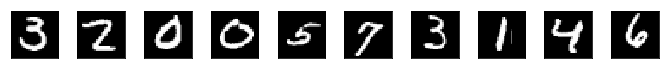

In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#新しいウィンドウを描画
fig = plt.figure(figsize=(9,9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.4)
#テストデータをランダムに選択する準備
tstlist = list(range(10000))
random.shuffle(tstlist)
#ランダムに選択した10件を検証データとして表示
for i in range(10):
    ax = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[tstlist[i]].reshape((28, 28)), cmap='gray')
    
for i in range(10):
    #data = np.asarray(x_test[tstlist[i]]).reshape((-1, 784))
    data = np.asarray(x_test[tstlist[i]]).reshape((-1, 28,28,1))
    res = model.predict([data])[0]
    y = res.argmax()
    per = round(float(res[y] * 100),3) # --- 正解率を小数3桁精度(四捨五入)で求める
    ydata = y_test[tstlist[i]].argmax() # --- 正解
    if y == ydata:
        print("〇 {0} / {1} ({2} %)".format(y, ydata, per))
    else:
        print("× {0} / {1} ({2} %)".format(y, ydata, per))

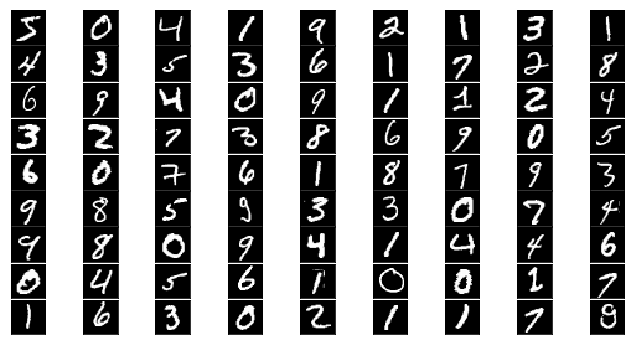

In [7]:
#MNISTデータの表示
fig = plt.figure(figsize=(9, 9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)
for i in range(81):
    ax = fig.add_subplot(9, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape((28, 28)), cmap='gray')